### Real World

### Scenario

I want to measure the "On Time Delivery" performance of delivery of Products to our customers to determine if we are hitting the commitments communicated at the time of ordering.

* We ship 4 product offerings : LowEnd, Good, Better, Super
* There is a manufacturing lead time target on each in days: 2, 3, 3, 4
* We supply 5 countries: UK, Germany, France, Netherlands, Spain.
* There is a logistics lead time target on each in days: 2, 4, 3, 3, 5
* Target to hit "On Time Delivery" is to come in under Manufacturing + Logistics Lead time

The idea is to determine how we are performing to the target Lead times promised
Where we are off target what are the factors and do we need to change the commitments to the customer? 


### Creating the Dataset 

https://www.youtube.com/watch?v=hUes6y2b--0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

### Creating a Dataframe

Using this as a refernece point and study aid
https://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation

In order to simulate the required data a number of steps are to be folloed initially.
1. Create an empty Dataframe of 200 sample size
2. Popupaulte each column with generated data to build a table to be used later to investigate the dataset.

In [35]:
df = pd.DataFrame(columns=['Product','Country','MLT','LLT'],index=range(1,200))
df.head(3)
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/

,Product,Country,MLT,LLT
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [36]:
prod=pd.Categorical(["LowEnd","Good","Better","Best"])
np.random.seed(124)
df['Product'] = np.random.choice(list(prod),len(df),p=[0.15,0.35,0.30,0.20])

In [37]:
actual=np.random.normal(0,2,200)
actual[actual < 0] = 0 # need to manage the negatives
#https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array
df['Actual_MLT'] = actual,len(df)



ValueError: Length of values does not match length of index

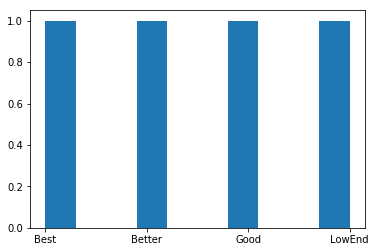

In [28]:
# Randomly select a list of Products Sold (restricted by setting probability)
#Product=["LowEnd","Good","Better","Best"]
#x=np.random.choice(Product,500,p=[0.15,0.35,0.30,0.20]) #p sets the probability
#np.random.seed(124)
plt.hist(prod)
plt.show()



In [38]:
countries = {"UK", "Germany", "France", "Netherlands", "Spain"}
df['Country'] = np.random.choice(list(countries), len(df))
df

,Product,Country,MLT,LLT
1,LowEnd,UK,NaN,NaN
2,Better,UK,NaN,NaN
3,Better,Germany,NaN,NaN
4,Good,UK,NaN,NaN
5,Good,Germany,NaN,NaN
6,Good,Spain,NaN,NaN
7,Better,Spain,NaN,NaN
8,Good,France,NaN,NaN
9,Good,Germany,NaN,NaN
10,Better,UK,NaN,NaN


Now I want to associate the Target Leadtime Days to both the Product MT and LLT - I am doing this using the map function....  "Pandas’ map function lets you add a new column with values from a dictionary if the data frame has a column matching the keys in the dictionary" http://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/

In [49]:
#Using map function
#Aligning the Product Offering to its associated Target Leadtime
MLT_Target={"LowEnd":2,"Good":3,"Better":5,"Best":6}
df['MLT']= df['Product'].map(MLT_Target)
# Aligning the Product Offering to its associated Target Leadtime
LLT_Target={"UK":2, "Germany":4, "France":3, "Netherlands":3, "Spain":5}
df['LLT']= df['Country'].map(LLT_Target)
df['Total Target LT'] = (df.MLT + df.LLT)
df.head()

,Product,Country,MLT,LLT,Total Target LT
1,LowEnd,UK,2,2,4
2,Better,UK,5,2,7
3,Better,Germany,5,4,9
4,Good,UK,3,2,5
5,Good,Germany,3,4,7


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html


In [48]:
df

,Product,Country,MLT,LLT,Total Target LT
1,LowEnd,UK,2,2,NaN
2,Better,UK,5,2,NaN
3,Better,Germany,5,4,NaN
4,Good,UK,3,2,NaN
5,Good,Germany,3,4,NaN
6,Good,Spain,3,5,NaN
7,Better,Spain,5,5,NaN
8,Good,France,3,3,NaN
9,Good,Germany,3,4,NaN
10,Better,UK,5,2,NaN


In [ ]:
y=np.random.randint(-1,6,1000)
# randn gives a normal distribution which is what i would expect here

In [ ]:
plt.hist(y)
plt.show()

In [ ]:
np.random.random_integers(5)

In [ ]:
y